In [3]:
#install citypy library
!pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
%matplotlib notebook

In [5]:
# import dependencies
import requests as req
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from citipy import citipy


In [7]:
# Set style for plots
plt.style.use("seaborn")

In [8]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a new data frame to hold randomly picked coordinates and corresponding city information
cities_df = pd.DataFrame()

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [9]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [ ]:
# Get our base URL for the Open Weather API
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Get our API Key 
key = "insert key here"

# Set what units will be returned
query_units = "imperial"

# Create an empty list to store our JSON response objects
weather_data = []

for x in lats:
    for y in lngs:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.shape

# Read through each city in our cities list and perform a request call to the API.
# Store each JSON response object into the list
for city in cities:
    query_url = base_url + "?apikey=" + key + "&q=" + city + "&units=" + query_units
    weather_data.append(req.get(query_url).json())

# Now our weather_data list contains five different JSON objects for each city
# Print the first city (London) 
weather_data[0]


In [ ]:
# Extract the city name, temperature, and weather description of each City
city_name = [data['name'] for data in weather_data]
max_temperature_data = [data['main']['temp_max'] for data in weather_data]
latitude_data = [data['coord']['lat'] for data in weather_data]
humidity_data = [data['main']['humidity'] for data in weather_data]
cloudiness_data = [data['clouds']['all'] for data in weather_data]
wind_speed_data = [data['wind']['speed'] for data in weather_data]
date_data = [data['dt'] for data in weather_data]
country_data = [data['sys']['country'] for data in weather_data]
longitude_data = [data['coord']['lon'] for data in weather_data]

# Create a dictionary containing our newly extracted information
weather_data = {"City": city_name, 
                "Max Temperature": max_temperature_data,
                "Latitude": latitude_data,
                "Humidity": humidity_data,
                "Cloudiness":cloudiness_data,
                "Wind Speed" :wind_speed_data,
                "Date": date_data,
                "Country": country_data,
                "Longitude":longitude_data}



In [ ]:
# Convert our dictionary into a Pandas Data Frame
weather_data = pd.DataFrame(weather_data)
weather_data



In [ ]:
lat_vs_temp_chart = weather_data.plot(kind="scatter", x="Latitude", y="Max Temperature", grid=True, figsize=(10,5),
              title="Latitude Vs. Temperature")
lat_vs_temp_chart

In [ ]:
lat_vs_humid_chart = weather_data.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(10,5),
              title="Latitude Vs. Humidity")
lat_vs_humid_chart

In [ ]:
lat_vs_cloud_chart = weather_data.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(10,5),
              title="Latitude Vs. Cloudiness")
lat_vs_cloud_chart

<IPython.core.display.Javascript object>


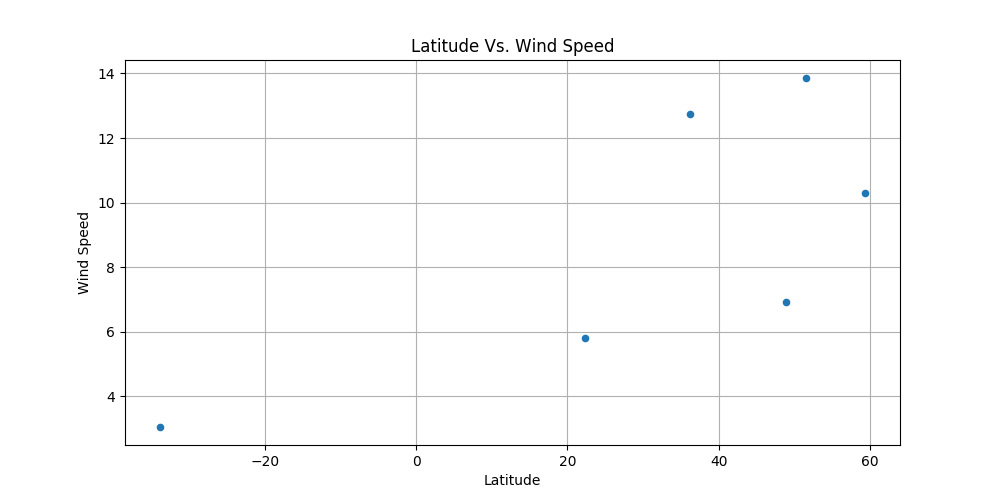

In [69]:
lat_vs_wind_chart = weather_data.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(10,5),
              title="Latitude Vs. Wind Speed")
lat_vs_wind_chart